In [17]:
from astropy.table import Table
import numpy as np
import matplotlib.pyplot as plt
import glob
import os
import fitsio
import desitarget.mtl
from astropy.io import fits
from astropy.table import Table, Column, vstack
import json
import shutil
import healpy


from desitarget.targetmask import desi_mask, bgs_mask, mws_mask, obsconditions
from collections import Counter
import subprocess

%matplotlib inline

In [2]:
targets_filename = "/project/projectdirs/desi/target/catalogs/dr9d/PRnone/targets/main/resolve/bright/targets-dr9-hp-X.fits"

In [3]:
targets = Table.read(target_filename)

In [4]:
targets

RELEASE,BRICKID,BRICKNAME,BRICK_OBJID,MORPHTYPE,RA,RA_IVAR,DEC,DEC_IVAR,DCHISQ [5],EBV,FLUX_G,FLUX_R,FLUX_Z,FLUX_IVAR_G,FLUX_IVAR_R,FLUX_IVAR_Z,MW_TRANSMISSION_G,MW_TRANSMISSION_R,MW_TRANSMISSION_Z,FRACFLUX_G,FRACFLUX_R,FRACFLUX_Z,FRACMASKED_G,FRACMASKED_R,FRACMASKED_Z,FRACIN_G,FRACIN_R,FRACIN_Z,NOBS_G,NOBS_R,NOBS_Z,PSFDEPTH_G,PSFDEPTH_R,PSFDEPTH_Z,GALDEPTH_G,GALDEPTH_R,GALDEPTH_Z,FLUX_W1,FLUX_W2,FLUX_W3,FLUX_W4,FLUX_IVAR_W1,FLUX_IVAR_W2,FLUX_IVAR_W3,FLUX_IVAR_W4,MW_TRANSMISSION_W1,MW_TRANSMISSION_W2,MW_TRANSMISSION_W3,MW_TRANSMISSION_W4,ALLMASK_G,ALLMASK_R,ALLMASK_Z,FIBERFLUX_G,FIBERFLUX_R,FIBERFLUX_Z,FIBERTOTFLUX_G,FIBERTOTFLUX_R,FIBERTOTFLUX_Z,REF_EPOCH,WISEMASK_W1,WISEMASK_W2,MASKBITS,LC_FLUX_W1 [13],LC_FLUX_W2 [13],LC_FLUX_IVAR_W1 [13],LC_FLUX_IVAR_W2 [13],LC_NOBS_W1 [13],LC_NOBS_W2 [13],LC_MJD_W1 [13],LC_MJD_W2 [13],SHAPE_R,SHAPE_E1,SHAPE_E2,SHAPE_R_IVAR,SHAPE_E1_IVAR,SHAPE_E2_IVAR,REF_ID,REF_CAT,GAIA_PHOT_G_MEAN_MAG,GAIA_PHOT_G_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_MEAN_MAG,GAIA_PHOT_BP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_RP_MEAN_MAG,GAIA_PHOT_RP_MEAN_FLUX_OVER_ERROR,GAIA_PHOT_BP_RP_EXCESS_FACTOR,GAIA_ASTROMETRIC_EXCESS_NOISE,GAIA_DUPLICATED_SOURCE,GAIA_ASTROMETRIC_SIGMA5D_MAX,GAIA_ASTROMETRIC_PARAMS_SOLVED,PARALLAX,PARALLAX_IVAR,PMRA,PMRA_IVAR,PMDEC,PMDEC_IVAR,PHOTSYS,TARGETID,DESI_TARGET,BGS_TARGET,MWS_TARGET,SUBPRIORITY,OBSCONDITIONS,PRIORITY_INIT,NUMOBS_INIT,HPXPIXEL
int16,int32,str8,int32,str4,float64,float32,float64,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,int16,int16,int16,float32,float32,float32,float32,float32,float32,float32,uint8,uint8,int16,float32,float32,float32,float32,int16,int16,float64,float64,float32,float32,float32,float32,float32,float32,int64,str2,float32,float32,float32,float32,float32,float32,float32,float32,bool,float32,float64,float32,float32,float32,float32,float32,float32,str1,int64,int64,int64,int64,float64,int64,int64,int64,int64
9001,519393,1601p347,19,DEV,160.2081471729696,2500183000000.0,34.63049163005599,2439282200000.0,153183.14 .. 210344.67,0.018163566,7.479974,39.907806,89.646706,68.253235,12.383219,23.243439,0.9476521,0.9644292,0.9799447,0.0023902107,0.0032801765,0.04475713,0.036510743,0.039590787,0.03454342,0.995173,0.99544907,0.82899183,2,2,5,471.0476,69.36107,284.82666,303.26926,54.37627,139.82901,148.87311,91.492546,-0.51589555,-719.0182,2.2521763,0.43815595,0.00067331764,9.358504e-06,0.99692655,0.99811137,0.9995969,0.99984777,0,0,0,1.9025872,10.150848,22.802309,1.9025877,10.150851,22.802315,0.0,0,0,0,155.52248 .. 0.0,98.21576 .. 0.0,0.20930465 .. 0.0,0.054900397 .. 0.0,13 .. 0,13 .. 0,55332.835814765 .. 0.0,55332.835814765 .. 0.0,1.5504575,0.029096976,-0.012007851,29259.29,109821.305,54889.207,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,39588995138584595,1152921504606847233,514,0,0.7711840984536714,5,2100,1,5331
9001,519393,1601p347,20,DEV,160.20971517357032,1263913000000.0,34.627760751485255,1207379400000.0,61147.516 .. 70577.86,0.018154258,2.2102985,12.656787,29.225609,172.17554,28.812904,76.14686,0.9476782,0.9644471,0.9799549,0.0066316817,0.012778497,0.004976541,0.0058277952,0.009491009,0.007591935,0.9999992,0.99999875,0.98428166,2,2,6,471.0476,69.36107,325.70984,303.26926,54.37627,166.57507,50.706264,34.38234,32.784615,158.77722,3.0467246,0.5730715,0.0008414752,1.0282354e-05,0.9969281,0.9981123,0.99959713,0.9998478,0,0,0,0.954064,5.463237,12.615084,0.95563823,5.471636,12.63395,0.0,0,0,0,53.329136 .. 0.0,35.667553 .. 0.0,0.28408265 .. 0.0,0.07059941 .. 0.0,13 .. 0,13 .. 0,55332.835814765 .. 0.0,55332.835814765 .. 0.0,0.77503705,0.073063165,-0.23169774,22079.096,9920.733,17012.252,0,,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,False,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,N,3958899513858459

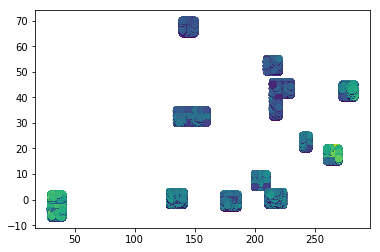

In [6]:
plt.scatter(targets['RA'], targets['DEC'], c=targets['BRICK_OBJID'])

In [8]:
print(targets['RA'].min(), targets['RA'].max())
print(targets['DEC'].min(), targets['DEC'].max())

29.791383237542618 283.32680410926866
-7.124873851459127 70.12499081988999


In [9]:
sky_file = "/project/projectdirs/desi/target/catalogs/dr8/0.31.0/skies/skies-dr8-0.31.0.fits"
sky_data = Table.read(sky_file)

In [10]:
print(len(sky_data))

105673896


In [11]:
def ra_dec_subset(data, ra_min=130, ra_max=180, dec_min=-10, dec_max=40):
    subset_ii = (data['RA']>ra_min) & (data['RA']<ra_max)
    subset_ii &= (data['DEC']>dec_min) & (data['DEC']<dec_max)
    return subset_ii

In [12]:
ii_sky = ra_dec_subset(sky_data, ra_min=25.0, ra_max = 285.0, dec_min=-10.0, dec_max=75.0)

In [13]:
print(np.count_nonzero(ii_sky))

61086760


In [14]:
initial_sky_file = "sky_dr9d_region.fits"
sky_data[ii_sky].write(initial_sky_file, overwrite=True)
print('done writing sky')

done writing sky


In [30]:
mask_values = list(set(targets['BGS_TARGET']))

In [16]:
set(targets['MWS_TARGET'])

{0,
 2,
 4,
 6,
 17,
 21,
 23,
 33,
 35,
 37,
 39,
 768,
 770,
 772,
 774,
 1280,
 1282,
 1284,
 1286,
 6144,
 10240}

In [32]:
for mask in mask_values:
    print(mask, bgs_mask.names(mask))

0 []
257 ['BGS_FAINT', 'BGS_FAINT_NORTH']
514 ['BGS_BRIGHT', 'BGS_BRIGHT_NORTH']
131074 ['BGS_BRIGHT', 'BGS_BRIGHT_SOUTH']
1028 ['BGS_WISE', 'BGS_WISE_NORTH']
65537 ['BGS_FAINT', 'BGS_FAINT_SOUTH']
262148 ['BGS_WISE', 'BGS_WISE_SOUTH']
265 ['BGS_FAINT', 'BGS_FAINT_HIP', 'BGS_FAINT_NORTH']
65545 ['BGS_FAINT', 'BGS_FAINT_HIP', 'BGS_FAINT_SOUTH']


In [ ]:
bgs_mask.names(257)